<a href="https://colab.research.google.com/github/cruzmarcela02/ciencia-de-datos/blob/main/TP1-aerolineas/colab-analisis/analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
!pip install squarify
!pip install textblob

In [ ]:
import squarify as squarify# pip install squarify
import matplotlib.lines as mlines
from textblob import TextBlob

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### CARGA ARCHIVO

In [ ]:
# Cargamos archivos:
# 1. https://drive.google.com/file/d/1ZJIc1Y_0G4hdx_0GkTrw10IYrlAE4SoQ/view?usp=drive_link
id='1ZJIc1Y_0G4hdx_0GkTrw10IYrlAE4SoQ'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('filtered_customer_booking.csv')

In [ ]:
 # 2. https://drive.google.com/file/d/1XGEH-SRn9wde2vZC5lHtYjYNKSPtxsiY/view?usp=drive_link
id='1XGEH-SRn9wde2vZC5lHtYjYNKSPtxsiY'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('customer_airways_data.csv')

In [ ]:
# 3. https://drive.google.com/file/d/132CgYVqb-uygkp8wM80ur_cghtUDaEI7/view?usp=sharing
id='132CgYVqb-uygkp8wM80ur_cghtUDaEI7'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('cleaned-reviews.csv')

In [ ]:
# 4. https://drive.google.com/file/d/14GjEtEbD2al063LU0thzp-jRhuJKgvql/view?usp=drive_link
id='14GjEtEbD2al063LU0thzp-jRhuJKgvql'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('airline_data.csv')

# **Abrimos los DataFrame**

In [ ]:
archivo_uno = pd.read_csv('filtered_customer_booking.csv')
archivo_uno

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49978,49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49979,49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49980,49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
archivo_dos = pd.read_csv("customer_airways_data.csv", encoding='iso-8859-1')
archivo_dos

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
archivo_tres = pd.read_csv('cleaned-reviews.csv')
archivo_tres

,Unnamed: 0,reviews,rates,date,country,verified,comments
0,0,✅ Trip Verified | Excellent service both on th...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...
1,1,✅ Trip Verified | Good lounge at Cape Town. O...,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...
2,2,✅ Trip Verified | A really excellent journey....,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...
3,3,✅ Trip Verified | This flight was one of the ...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...
4,4,Not Verified | It seems that there is a race t...,2,2023-01-19,United States,False,verified seems race bottom amongst airline can...
...,...,...,...,...,...,...,...
3406,3413,Flew British Airways from Sydney to Venice on ...,10,2014-05-20,Australia,False,flew british airway sydney venice nd april ret...
3407,3414,Recently for our honeymoon we took advantage o...,1,2014-05-19,United Kingdom,False,recently honeymoon took advantage ba promo fly...
3408,3415,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,4,2014-05-18,United Kingdom,False,lgw antigua april antigua lgw may boeing start...
3409,3416,LHR-JTR-LHR. A tale of opposites for BA's new ...,2,2014-05-18,United Kingdom,False,lhr jtr lhr tale opposite ba new route santori...


In [ ]:
archivo_cuatro = pd.read_csv('airline_data.csv')
archivo_cuatro

,Unnamed: 0,reviews,rates,date,country
0,0,✅ Trip Verified | Excellent service both on th...,5.00,24th January 2023,United Kingdom
1,1,✅ Trip Verified | Good lounge at Cape Town. O...,9.00,24th January 2023,United Kingdom
2,2,✅ Trip Verified | A really excellent journey....,9.00,23rd January 2023,United Kingdom
3,3,✅ Trip Verified | This flight was one of the ...,9.00,21st January 2023,United Kingdom
4,4,Not Verified | It seems that there is a race t...,2.00,19th January 2023,United States
...,...,...,...,...,...
3413,3413,Flew British Airways from Sydney to Venice on ...,6.00,20th May 2014,Australia
3414,3414,Recently for our honeymoon we took advantage o...,10.00,19th May 2014,United Kingdom
3415,3415,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,1.00,18th May 2014,United Kingdom
3416,3416,LHR-JTR-LHR. A tale of opposites for BA's new ...,4.00,18th May 2014,United Kingdom



# Agrupaciones de archivos

### **GroupBy-archivo_uno/dos**

In [ ]:
datos1 = archivo_uno.describe()
datos1

,Unnamed: 0,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,"49,982.00","49,982.00","49,982.00","49,982.00","49,982.00","49,982.00","49,982.00","49,982.00","49,982.00","49,982.00","49,982.00"
mean,"24,999.96",1.59,84.75,23.05,9.07,3.81,0.67,0.30,0.43,7.28,0.15
std,"14,433.59",1.02,89.92,33.89,5.41,1.99,0.47,0.46,0.49,1.50,0.36
min,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,4.67,0.00
25%,"12,500.25",1.00,21.00,5.00,5.00,2.00,0.00,0.00,0.00,5.62,0.00
50%,"25,000.50",1.00,51.00,17.00,9.00,4.00,1.00,0.00,0.00,7.57,0.00
75%,"37,498.75",2.00,115.00,28.00,13.00,5.00,1.00,1.00,1.00,8.83,0.00
max,"49,999.00",9.00,495.00,778.00,23.00,7.00,1.00,1.00,1.00,9.50,1.00


In [ ]:
plot1 = archivo_uno.groupby(['route','num_passengers']).size().reset_index(name='count')
plot1

,route,num_passengers,count
0,AKLDEL,1,12
1,AKLDEL,2,5
2,AKLDEL,3,1
3,AKLDEL,4,2
4,AKLHGH,1,1
...,...,...,...
2780,TRZXIY,2,2
2781,TWUWUH,2,2
2782,TWUXIY,1,3
2783,TWUXIY,2,4


In [ ]:
df1_lengthstay_0 = archivo_uno.loc[archivo_uno['length_of_stay'] == 0]
df1_lengthstay_not_0 = archivo_uno.loc[archivo_uno['length_of_stay'] != 0]

df1_lengthstay_0

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
2195,2197,1,Internet,OneWay,64,0,10,4,AKLTPE,Taiwan,1,0,0,4.67,0
3898,3901,2,Internet,OneWay,24,0,0,1,CGKICN,Indonesia,1,0,1,6.62,0
3925,3928,3,Internet,OneWay,44,0,7,7,CGKIKA,Iran,1,0,0,8.15,0
3999,4002,1,Internet,OneWay,60,0,10,6,CGKKIX,Indonesia,0,1,0,7.00,0
4025,4028,1,Internet,OneWay,84,0,5,3,CGKKIX,Indonesia,1,0,1,7.00,0
4491,4494,1,Internet,OneWay,7,0,5,2,CKGKCH,Malaysia,1,1,0,4.83,0
10753,10758,2,Internet,OneWay,46,0,20,1,DPSMEL,Chile,1,1,0,8.83,0
10918,10923,2,Internet,RoundTrip,116,0,9,3,DPSPUS,South Korea,1,0,0,6.33,0
11077,11082,1,Internet,OneWay,49,0,11,4,DPSSYD,Australia,0,0,1,8.58,0


In [ ]:
df1_type_oneway = archivo_uno.loc[archivo_uno['trip_type'] == 'OneWay']
df1_type_oneway

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
81,81,1,Internet,OneWay,67,1,10,2,AKLKTM,New Zealand,1,0,0,4.75,0
103,103,1,Internet,OneWay,27,1,13,2,AKLKUL,New Zealand,1,1,0,8.83,0
260,260,1,Internet,OneWay,6,1,23,7,AKLKUL,New Zealand,1,0,0,8.83,0
306,306,1,Internet,OneWay,24,1,0,3,AKLKUL,New Zealand,1,0,0,8.83,0
338,338,2,Internet,OneWay,139,1,8,5,AKLKUL,New Zealand,1,0,0,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48806,48824,2,Internet,OneWay,40,6,5,1,MELPEK,China,1,0,1,8.83,0
48903,48921,2,Internet,OneWay,184,6,7,6,MELPUS,South Korea,0,0,0,8.83,0
48904,48922,1,Internet,OneWay,186,6,8,3,MELPUS,South Korea,1,0,0,8.83,0
48910,48928,2,Internet,OneWay,294,6,7,3,MELPVG,Malaysia,1,1,0,8.83,0


In [ ]:
df1_lengthstay_not_0

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49978,49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49979,49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49980,49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
plot2a = df1_lengthstay_0.groupby(['length_of_stay','num_passengers', "route"]).size().reset_index(name='count')
plot2a

,length_of_stay,num_passengers,route,count
0,0,1,AKLTPE,1
1,0,1,CGKKIX,2
2,0,1,CKGKCH,1
3,0,1,DPSSYD,1
4,0,2,CGKICN,1
5,0,2,DPSMEL,1
6,0,2,DPSPUS,1
7,0,3,CGKIKA,1


In [ ]:
plot2b = df1_lengthstay_not_0.groupby(['length_of_stay','num_passengers', "route"]).size().reset_index(name='count')
plot2b

,length_of_stay,num_passengers,route,count
0,1,1,AKLKTM,1
1,1,1,AKLKUL,14
2,1,1,AORKIX,1
3,1,1,BDOICN,1
4,1,1,BKIMEL,3
...,...,...,...,...
18280,577,1,PNHSYD,1
18281,603,2,AKLKUL,1
18282,610,1,DMKSYD,1
18283,773,2,OOLTPE,1


In [ ]:
plot3 = archivo_uno.groupby(['trip_type','num_passengers']).size().reset_index(name='count')
plot3

,trip_type,num_passengers,count
0,CircleTrip,1,69
1,CircleTrip,2,36
2,CircleTrip,3,6
3,CircleTrip,4,3
4,CircleTrip,5,1
5,CircleTrip,6,1
6,OneWay,1,254
7,OneWay,2,89
8,OneWay,3,20
9,OneWay,4,17


In [ ]:
valores = archivo_uno['sales_channel'].unique()
valores

array(['Internet', 'Mobile'], dtype=object)

In [ ]:
plot4 = archivo_uno.groupby(['sales_channel','purchase_lead']).size().reset_index(name='count')
plot4

,sales_channel,purchase_lead,count
0,Internet,0,316
1,Internet,1,613
2,Internet,2,594
3,Internet,3,503
4,Internet,4,550
...,...,...,...
847,Mobile,440,2
848,Mobile,442,1
849,Mobile,443,1
850,Mobile,445,4


In [ ]:
counts_channel = archivo_uno['sales_channel'].value_counts()
counts_channel

sales_channel
Internet    44366
Mobile       5616
Name: count, dtype: int64

In [ ]:
plot4_internet = plot4[plot4['sales_channel'] == 'Internet']
plot4_internet

,sales_channel,purchase_lead,count
0,Internet,0,316
1,Internet,1,613
2,Internet,2,594
3,Internet,3,503
4,Internet,4,550
...,...,...,...
446,Internet,463,1
447,Internet,471,1
448,Internet,477,1
449,Internet,483,1


In [ ]:
plot4_mobile = plot4[plot4['sales_channel'] == 'Mobile']
plot4_mobile

,sales_channel,purchase_lead,count
451,Mobile,0,54
452,Mobile,1,72
453,Mobile,2,76
454,Mobile,3,73
455,Mobile,4,56
...,...,...,...
847,Mobile,440,2
848,Mobile,442,1
849,Mobile,443,1
850,Mobile,445,4


In [ ]:
plot_salechannel = archivo_uno.groupby(['sales_channel','num_passengers']).size().reset_index(name='count')
plot_salechannel_i = plot_salechannel.loc[plot_salechannel['sales_channel'] == 'Internet']
plot_salechannel_m = plot_salechannel.loc[plot_salechannel['sales_channel'] == 'Mobile']

In [ ]:
plot_salechannel_i

,sales_channel,num_passengers,count
0,Internet,1,27790
1,Internet,2,11417
2,Internet,3,2554
3,Internet,4,1616
4,Internet,5,495
5,Internet,6,254
6,Internet,7,101
7,Internet,8,77
8,Internet,9,62


In [ ]:
plot_salechannel_m

,sales_channel,num_passengers,count
9,Mobile,1,3556
10,Mobile,2,1378
11,Mobile,3,385
12,Mobile,4,167
13,Mobile,5,66
14,Mobile,6,35
15,Mobile,7,13
16,Mobile,8,12
17,Mobile,9,4


In [ ]:
plot5 = archivo_uno.groupby(['flight_hour','flight_day'])['route'].count().reset_index()
plot5

,flight_hour,flight_day,route
0,0,1,248
1,0,2,259
2,0,3,229
3,0,4,233
4,0,5,224
...,...,...,...
163,23,3,149
164,23,4,149
165,23,5,125
166,23,6,113


In [ ]:
plot6 = archivo_uno.groupby(['flight_hour','flight_duration'])['route'].count().reset_index()
plot6

,flight_hour,flight_duration,route
0,0,4.67,47
1,0,4.72,10
2,0,4.75,27
3,0,4.83,1
4,0,5.00,5
...,...,...,...
481,23,7.57,51
482,23,8.15,3
483,23,8.58,206
484,23,8.67,11


In [ ]:
plot7 = archivo_uno.groupby(['num_passengers','wants_extra_baggage'])['route'].count().reset_index()
plot7

,num_passengers,wants_extra_baggage,route
0,1,0,11799
1,1,1,19547
2,2,0,3560
3,2,1,9235
4,3,0,661
5,3,1,2278
6,4,0,327
7,4,1,1456
8,5,0,94
9,5,1,467


In [ ]:
plot8 = archivo_uno.groupby(['num_passengers','wants_preferred_seat'])['route'].count().reset_index()
plot8

,num_passengers,wants_preferred_seat,route
0,1,0,22592
1,1,1,8754
2,2,0,8578
3,2,1,4217
4,3,0,1979
5,3,1,960
6,4,0,1186
7,4,1,597
8,5,0,382
9,5,1,179


In [ ]:
plot9 = archivo_uno.groupby(['num_passengers','wants_in_flight_meals'])['route'].count().reset_index()
plot9

,num_passengers,wants_in_flight_meals,route
0,1,0,18144
1,1,1,13202
2,2,0,7376
3,2,1,5419
4,3,0,1581
5,3,1,1358
6,4,0,916
7,4,1,867
8,5,0,304
9,5,1,257


In [ ]:
plot10 = archivo_dos.groupby(['length_of_stay', 'purchase_lead'])['sales_channel'].count().reset_index()
plot10

,length_of_stay,purchase_lead,sales_channel
0,0,7,1
1,0,24,1
2,0,44,1
3,0,46,1
4,0,49,1
...,...,...,...
12204,577,367,1
12205,603,32,1
12206,610,10,1
12207,773,11,1


In [ ]:
plot11 = archivo_dos.groupby('flight_day')['flight_duration'].mean().reset_index()
plot11

,flight_day,flight_duration
0,Fri,7.25
1,Mon,7.26
2,Sat,7.30
3,Sun,7.37
4,Thu,7.25
5,Tue,7.26
6,Wed,7.26


In [ ]:
plot12 = archivo_uno.groupby('route')['length_of_stay'].mean().round().reset_index()
plot12

,route,length_of_stay
0,AKLDEL,33.00
1,AKLHGH,17.00
2,AKLHND,18.00
3,AKLICN,28.00
4,AKLKIX,74.00
...,...,...
794,TRZWUH,62.00
795,TRZXIY,50.00
796,TWUWUH,4.00
797,TWUXIY,23.00


In [ ]:
plot13 = archivo_uno.groupby('route')['num_passengers'].mean().round().reset_index()
plot13

,route,num_passengers
0,AKLDEL,2.00
1,AKLHGH,1.00
2,AKLHND,2.00
3,AKLICN,1.00
4,AKLKIX,1.00
...,...,...
794,TRZWUH,1.00
795,TRZXIY,1.00
796,TWUWUH,2.00
797,TWUXIY,2.00


In [ ]:
plot14 = archivo_uno.groupby('trip_type')['num_passengers'].count().reset_index()
plot14

,trip_type,num_passengers
0,CircleTrip,116
1,OneWay,387
2,RoundTrip,49479


In [ ]:
plot15 = archivo_uno.groupby('trip_type')['length_of_stay'].mean().round().reset_index()
plot15

,trip_type,length_of_stay
0,CircleTrip,25.00
1,OneWay,18.00
2,RoundTrip,23.00


### **GroupBy-archivo_tres/cuatro**

In [ ]:
def buscar_palabras_clave(comentario):
    palabras_clave = ['excellent','very good', 'good', 'bad', 'worst']
    for palabra in palabras_clave:
        if palabra in comentario.lower():
            return palabra
    return 'not_defined'

In [ ]:
archivo_tres['key_word_reviews'] = archivo_tres['reviews'].apply(buscar_palabras_clave)
archivo_tres['key_word_comments'] = archivo_tres['comments'].apply(buscar_palabras_clave)
archivo_tres

,Unnamed: 0,reviews,rates,date,country,verified,comments,key_word_reviews,key_word_comments
0,0,✅ Trip Verified | Excellent service both on th...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...,excellent,excellent
1,1,✅ Trip Verified | Good lounge at Cape Town. O...,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...,good,good
2,2,✅ Trip Verified | A really excellent journey....,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...,excellent,excellent
3,3,✅ Trip Verified | This flight was one of the ...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...,worst,worst
4,4,Not Verified | It seems that there is a race t...,2,2023-01-19,United States,False,verified seems race bottom amongst airline can...,not_defined,not_defined
...,...,...,...,...,...,...,...,...,...
3406,3413,Flew British Airways from Sydney to Venice on ...,10,2014-05-20,Australia,False,flew british airway sydney venice nd april ret...,not_defined,not_defined
3407,3414,Recently for our honeymoon we took advantage o...,1,2014-05-19,United Kingdom,False,recently honeymoon took advantage ba promo fly...,bad,bad
3408,3415,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,4,2014-05-18,United Kingdom,False,lgw antigua april antigua lgw may boeing start...,bad,bad
3409,3416,LHR-JTR-LHR. A tale of opposites for BA's new ...,2,2014-05-18,United Kingdom,False,lhr jtr lhr tale opposite ba new route santori...,excellent,excellent


In [ ]:
plot15 = archivo_tres.groupby(['key_word_reviews', 'verified'])['rates'].count().reset_index()
plot15

,key_word_reviews,verified,rates
0,bad,False,135
1,bad,True,71
2,excellent,False,342
3,excellent,True,87
4,good,False,613
5,good,True,193
6,not_defined,False,1090
7,not_defined,True,533
8,very good,False,170
9,very good,True,47


In [ ]:
valores_posibles = sorted(archivo_tres['rates'].unique())
valores_posibles

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
plot16 = archivo_tres.groupby('key_word_reviews')['rates'].mean().reset_index()
plot16

,key_word_reviews,rates
0,bad,4.30
1,excellent,5.16
2,good,4.74
3,not_defined,4.87
4,very good,4.82
5,worst,4.37


In [ ]:
plot17 = archivo_tres.groupby(['key_word_reviews', 'rates']).size().reset_index(name='count')
plot17

,key_word_reviews,rates,count
0,bad,1,57
1,bad,2,22
2,bad,3,30
3,bad,4,11
4,bad,5,10
5,bad,6,13
6,bad,7,20
7,bad,8,15
8,bad,9,17
9,bad,10,11


In [ ]:
archivo_tres['date'] = pd.to_datetime(archivo_tres['date']) ##paso la columna a un tipo de dato de fecha
comentarios_por_mes = archivo_tres.groupby(archivo_tres['date'].dt.to_period('M')).size().reset_index()
cant_comentarios_por_año = archivo_tres.groupby(archivo_tres['date'].dt.to_period('A')).size().reset_index(name='count')
plot_calificacion_promedio_por_mes = archivo_tres.groupby(archivo_tres['date'].dt.to_period('M'))['rates'].mean().reset_index()
calificacion_promedio_por_año = archivo_tres.groupby(archivo_tres['date'].dt.to_period('A'))['rates'].mean().reset_index()

In [ ]:
comentarios_por_mes ##veo cuantos comentarios por mes tengo

,date,0
0,2014-05,19
1,2014-06,73
2,2014-07,55
3,2014-08,39
4,2014-09,64
...,...,...
99,2022-09,12
100,2022-10,21
101,2022-11,11
102,2022-12,21


In [ ]:
plot_calificacion_promedio_por_mes ##veo cual es el promedio de rate por mes, de esta manera puedo ver el comportamiento a lo alrgo del tiempo

,date,rates
0,2014-05,5.42
1,2014-06,6.49
2,2014-07,5.96
3,2014-08,5.54
4,2014-09,5.30
...,...,...
99,2022-09,5.17
100,2022-10,5.00
101,2022-11,3.64
102,2022-12,3.57


In [ ]:
calificacion_promedio_por_año

,date,rates
0,2014,5.85
1,2015,5.46
2,2016,4.96
3,2017,3.87
4,2018,4.35
5,2019,4.75
6,2020,4.35
7,2021,4.32
8,2022,4.01
9,2023,4.82


In [ ]:
cant_comentarios_por_año

,date,count
0,2014,432
1,2015,736
2,2016,570
3,2017,572
4,2018,324
5,2019,356
6,2020,104
7,2021,87
8,2022,213
9,2023,17


In [ ]:
df3_calificacion = archivo_tres.loc[archivo_tres['date'].dt.year == 2017] ##como por lo hecho antes noto que el año con peor calificacion es el 2017 me enfoco enese año
df3_calificacion['mes'] = df3_calificacion['date'].dt.month

In [ ]:
df3_calificacion_año = archivo_tres.loc[archivo_tres['date'].dt.year == 2017]
df3_calificacion_año['year'] = df3_calificacion_año['date'].dt.year

In [ ]:
df3_calificacion_año

,Unnamed: 0,reviews,rates,date,country,verified,comments,key_word_reviews,key_word_comments,year
1101,1101,✅ Trip Verified | Hong Kong to London before ...,8,2017-12-30,China,True,hong kong london christmas first class boardin...,excellent,excellent,2017
1102,1102,✅ Trip Verified | Dublin to Heathrow. BA gets...,2,2017-12-28,United Kingdom,True,dublin heathrow ba get worse worse worse today...,not_defined,not_defined,2017
1103,1103,✅ Trip Verified | London to New York. Aircraf...,10,2017-12-26,United Kingdom,True,london new york aircraft dated ife poor meal s...,not_defined,not_defined,2017
1104,1104,✅ Trip Verified | New York to London. IFE was...,9,2017-12-23,United Kingdom,True,new york london ife good meal bad drink served...,good,good,2017
1105,1105,✅ Trip Verified | Budapest to Philadelphia vi...,1,2017-12-22,United States,True,budapest philadelphia via london changed retur...,worst,worst,2017
...,...,...,...,...,...,...,...,...,...,...
1668,1668,✅ Verified Review | Toronto to London return ...,7,2017-01-02,Canada,False,review toronto london return club world britis...,excellent,excellent,2017
1669,1669,✅ Verified Review | London Heathrow to Lima. ...,4,2017-01-02,United Kingdom,False,review london heathrow lima rave review norweg...,not_defined,not_defined,2017
1670,1670,✅ Verified Review | On my way home on 1st Jan...,3,2017-01-02,United Kingdom,False,review way home st january athens lhr flight b...,not_defined,not_defined,2017
1671,1671,✅ Verified Review | Stockholm to Denver via L...,2,2017-01-02,Sweden,False,review stockholm denver via london heathrow bo...,good,good,2017


In [ ]:
df3_calificacion_2020 = archivo_tres.loc[archivo_tres['date'].dt.year == 2020]
df3_calificacion_2020['mes'] = df3_calificacion_2020['date'].dt.month

In [ ]:
plot_2020 = df3_calificacion_2020.groupby(['mes']).size().reset_index(name='count')
plot_2020

,mes,count
0,1,34
1,2,14
2,3,17
3,4,12
4,5,5
5,6,4
6,7,3
7,8,3
8,9,2
9,10,3


In [ ]:
df3_calificacion_2014 = archivo_tres.loc[archivo_tres['date'].dt.year == 2014]
df3_calificacion_2014['mes'] = df3_calificacion_2014['date'].dt.month

In [ ]:
plot_2014 = df3_calificacion_2014.groupby(['mes']).size().reset_index(name='count')
plot_2014

,mes,count
0,5,19
1,6,73
2,7,55
3,8,39
4,9,64
5,10,75
6,11,56
7,12,51


In [ ]:
plot18 = df3_calificacion.groupby(['mes']).size().reset_index(name='count')
plot18

,mes,count
0,1,59
1,2,54
2,3,46
3,4,67
4,5,53
5,6,57
6,7,50
7,8,36
8,9,35
9,10,39


In [ ]:
plot19 = df3_calificacion_año.groupby(['year', 'key_word_reviews']).size().reset_index(name='count')
plot19

,year,key_word_reviews,count
0,2017,bad,46
1,2017,excellent,50
2,2017,good,146
3,2017,not_defined,267
4,2017,very good,31
5,2017,worst,32


In [ ]:
archivo_tres['comments_cleaned'] = archivo_tres['comments'].str.lower().replace('[^a-zA-Z0-9\s]', '', regex=True)

# Análisis de sentimientos con TextBlob, quiero ver si coinciden las keywords buscadas con los sentimientos
def analizar_sentimiento(texto):
    analisis = TextBlob(texto)
    if analisis.sentiment.polarity > 0:
        return 'positivo'
    elif analisis.sentiment.polarity < 0:
        return 'negativo'
    else:
        return 'neutral'

# Aplicar la función de análisis de sentimientos a cada comentario
archivo_tres['sentimiento'] = archivo_tres['comments_cleaned'].apply(analizar_sentimiento)
archivo_tres

,Unnamed: 0,reviews,rates,date,country,verified,comments,key_word_reviews,key_word_comments,comments_cleaned,sentimiento
0,0,✅ Trip Verified | Excellent service both on th...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...,excellent,excellent,excellent service ground board first class pro...,positivo
1,1,✅ Trip Verified | Good lounge at Cape Town. O...,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...,good,good,good lounge cape town time departure drink hig...,positivo
2,2,✅ Trip Verified | A really excellent journey....,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...,excellent,excellent,really excellent journey lounge overcrowded la...,positivo
3,3,✅ Trip Verified | This flight was one of the ...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...,worst,worst,flight one worst ever life wanted pamper bough...,negativo
4,4,Not Verified | It seems that there is a race t...,2,2023-01-19,United States,False,verified seems race bottom amongst airline can...,not_defined,not_defined,verified seems race bottom amongst airline can...,negativo
...,...,...,...,...,...,...,...,...,...,...,...
3406,3413,Flew British Airways from Sydney to Venice on ...,10,2014-05-20,Australia,False,flew british airway sydney venice nd april ret...,not_defined,not_defined,flew british airway sydney venice nd april ret...,positivo
3407,3414,Recently for our honeymoon we took advantage o...,1,2014-05-19,United Kingdom,False,recently honeymoon took advantage ba promo fly...,bad,bad,recently honeymoon took advantage ba promo fly...,positivo
3408,3415,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,4,2014-05-18,United Kingdom,False,lgw antigua april antigua lgw may boeing start...,bad,bad,lgw antigua april antigua lgw may boeing start...,negativo
3409,3416,LHR-JTR-LHR. A tale of opposites for BA's new ...,2,2014-05-18,United Kingdom,False,lhr jtr lhr tale opposite ba new route santori...,excellent,excellent,lhr jtr lhr tale opposite ba new route santori...,positivo


In [ ]:
plot_2017_comentarios = archivo_tres.loc[archivo_tres['date'].dt.year == 2017]
plot_2017_comentarios

,Unnamed: 0,reviews,rates,date,country,verified,comments,key_word_reviews,key_word_comments,comments_cleaned,sentimiento
1101,1101,✅ Trip Verified | Hong Kong to London before ...,8,2017-12-30,China,True,hong kong london christmas first class boardin...,excellent,excellent,hong kong london christmas first class boardin...,positivo
1102,1102,✅ Trip Verified | Dublin to Heathrow. BA gets...,2,2017-12-28,United Kingdom,True,dublin heathrow ba get worse worse worse today...,not_defined,not_defined,dublin heathrow ba get worse worse worse today...,negativo
1103,1103,✅ Trip Verified | London to New York. Aircraf...,10,2017-12-26,United Kingdom,True,london new york aircraft dated ife poor meal s...,not_defined,not_defined,london new york aircraft dated ife poor meal s...,negativo
1104,1104,✅ Trip Verified | New York to London. IFE was...,9,2017-12-23,United Kingdom,True,new york london ife good meal bad drink served...,good,good,new york london ife good meal bad drink served...,negativo
1105,1105,✅ Trip Verified | Budapest to Philadelphia vi...,1,2017-12-22,United States,True,budapest philadelphia via london changed retur...,worst,worst,budapest philadelphia via london changed retur...,negativo
...,...,...,...,...,...,...,...,...,...,...,...
1668,1668,✅ Verified Review | Toronto to London return ...,7,2017-01-02,Canada,False,review toronto london return club world britis...,excellent,excellent,review toronto london return club world britis...,positivo
1669,1669,✅ Verified Review | London Heathrow to Lima. ...,4,2017-01-02,United Kingdom,False,review london heathrow lima rave review norweg...,not_defined,not_defined,review london heathrow lima rave review norweg...,positivo
1670,1670,✅ Verified Review | On my way home on 1st Jan...,3,2017-01-02,United Kingdom,False,review way home st january athens lhr flight b...,not_defined,not_defined,review way home st january athens lhr flight b...,positivo
1671,1671,✅ Verified Review | Stockholm to Denver via L...,2,2017-01-02,Sweden,False,review stockholm denver via london heathrow bo...,good,good,review stockholm denver via london heathrow bo...,positivo


In [ ]:
agrupacion_2017 = plot_2017_comentarios.groupby(['key_word_reviews']).size().reset_index(name='count')
agrupacion_2017

,key_word_reviews,count
0,bad,46
1,excellent,50
2,good,146
3,not_defined,267
4,very good,31
5,worst,32


In [ ]:
agrupacion_rate_2017 = plot_2017_comentarios.groupby(['key_word_reviews', 'rates']).size().reset_index(name='count')
agrupacion_rate_2017

,key_word_reviews,rates,count
0,bad,1,18
1,bad,2,6
2,bad,3,9
3,bad,4,2
4,bad,5,2
5,bad,6,3
6,bad,7,3
7,bad,8,2
8,bad,9,1
9,excellent,1,11


In [ ]:
plot_2014_comentarios = archivo_tres.loc[archivo_tres['date'].dt.year == 2014]
plot_2014_comentarios

,Unnamed: 0,reviews,rates,date,country,verified,comments,key_word_reviews,key_word_comments,comments_cleaned,sentimiento
2979,2981,Premium Economy pricey but of questionable val...,3,2014-12-31,United States,False,premium economy pricey questionable value flow...,not_defined,not_defined,premium economy pricey questionable value flow...,positivo
2980,2982,Austin to London on a 787. Difficult to quite ...,8,2014-12-31,United Kingdom,False,austin london difficult quite place better noi...,very good,good,austin london difficult quite place better noi...,positivo
2981,2983,A very pleasant but flawed flight to Dallas. O...,6,2014-12-31,United Kingdom,False,pleasant flawed flight dallas plus side good l...,excellent,excellent,pleasant flawed flight dallas plus side good l...,positivo
2982,2984,LHR-SFO - Club World. I find myself nodding to...,8,2014-12-31,United Kingdom,False,lhr sfo club world find nodding negative yet f...,good,good,lhr sfo club world find nodding negative yet f...,positivo
2983,2985,Flew LHR-CPH in business class on 23rd Decembe...,1,2014-12-31,United Kingdom,False,flew lhr cph business class rd december new ca...,good,good,flew lhr cph business class rd december new ca...,positivo
...,...,...,...,...,...,...,...,...,...,...,...
3406,3413,Flew British Airways from Sydney to Venice on ...,10,2014-05-20,Australia,False,flew british airway sydney venice nd april ret...,not_defined,not_defined,flew british airway sydney venice nd april ret...,positivo
3407,3414,Recently for our honeymoon we took advantage o...,1,2014-05-19,United Kingdom,False,recently honeymoon took advantage ba promo fly...,bad,bad,recently honeymoon took advantage ba promo fly...,positivo
3408,3415,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,4,2014-05-18,United Kingdom,False,lgw antigua april antigua lgw may boeing start...,bad,bad,lgw antigua april antigua lgw may boeing start...,negativo
3409,3416,LHR-JTR-LHR. A tale of opposites for BA's new ...,2,2014-05-18,United Kingdom,False,lhr jtr lhr tale opposite ba new route santori...,excellent,excellent,lhr jtr lhr tale opposite ba new route santori...,positivo


In [ ]:
agrupacion_2014 = plot_2014_comentarios.groupby(['key_word_reviews']).size().reset_index(name='count')
agrupacion_2014

,key_word_reviews,count
0,bad,27
1,excellent,94
2,good,110
3,not_defined,150
4,very good,42
5,worst,9


In [ ]:
agrupacion_rate_2014 = plot_2014_comentarios.groupby(['key_word_reviews', 'rates']).size().reset_index(name='count')
agrupacion_rate_2014

,key_word_reviews,rates,count
0,bad,1,5
1,bad,2,1
2,bad,3,2
3,bad,4,4
4,bad,5,1
5,bad,6,1
6,bad,7,4
7,bad,8,3
8,bad,9,4
9,bad,10,2


In [ ]:
plot19 = archivo_tres.groupby(['sentimiento', 'rates']).size().reset_index(name='count')
plot19

,sentimiento,rates,count
0,negativo,1,226
1,negativo,2,101
2,negativo,3,104
3,negativo,4,55
4,negativo,5,69
5,negativo,6,62
6,negativo,7,80
7,negativo,8,84
8,negativo,9,82
9,negativo,10,81


In [ ]:
valores_posibles_paises = archivo_tres['country'].nunique() ##veo los valores posibles de paises
valores_posibles_paises

69

In [ ]:
plot20 = archivo_tres.groupby('country')['rates'].mean().reset_index(name='mean_rate') ##veo el promedio de puntaje de cada pais
plot20

,country,mean_rate
0,Argentina,7.67
1,Australia,5.41
2,Austria,4.90
3,Bahrain,1.00
4,Barbados,9.00
...,...,...
64,Ukraine,8.00
65,United Arab Emirates,3.75
66,United Kingdom,4.90
67,United States,4.35


In [ ]:
valores_clave = [0, 3, 6, 10] ##intervalos para segmentar los promedios
etiqueta = ['malo', 'neutro', 'bueno']

plot20['categoria'] = pd.cut(plot20['mean_rate'], bins=valores_clave, labels=etiqueta, right=False)
plot20

,country,mean_rate,categoria
0,Argentina,7.67,bueno
1,Australia,5.41,neutro
2,Austria,4.90,neutro
3,Bahrain,1.00,malo
4,Barbados,9.00,bueno
...,...,...,...
64,Ukraine,8.00,bueno
65,United Arab Emirates,3.75,neutro
66,United Kingdom,4.90,neutro
67,United States,4.35,neutro


In [ ]:
plot20_m = plot20.loc[plot20['categoria'] == 'malo']
plot20_m

,country,mean_rate,categoria
3,Bahrain,1.00,malo
6,Bermuda,1.00,malo
11,Cayman Islands,2.00,malo
18,Egypt,1.50,malo
22,Ghana,2.86,malo
28,Indonesia,2.00,malo
30,Israel,2.00,malo
36,Luxembourg,1.00,malo
38,Mexico,2.75,malo
44,Panama,1.00,malo


In [ ]:
plot20_n = plot20.loc[plot20['categoria'] == 'neutro']
plot20_n

,country,mean_rate,categoria
1,Australia,5.41,neutro
2,Austria,4.90,neutro
5,Belgium,5.81,neutro
8,Brazil,4.50,neutro
9,Bulgaria,3.67,neutro
10,Canada,4.91,neutro
12,China,4.89,neutro
14,Cyprus,5.00,neutro
15,Czech Republic,4.40,neutro
16,Denmark,5.55,neutro


In [ ]:
plot20_b = plot20.loc[plot20['categoria'] == 'bueno']
plot20_b

,country,mean_rate,categoria
0,Argentina,7.67,bueno
4,Barbados,9.00,bueno
7,Botswana,9.00,bueno
13,Costa Rica,8.00,bueno
17,Dominican Republic,9.00,bueno
42,Norway,6.00,bueno
62,Trinidad & Tobago,6.00,bueno
63,Turkey,6.33,bueno
64,Ukraine,8.00,bueno


In [ ]:
archivo_2020_frecuentes = archivo_tres[archivo_tres['date'].dt.year == 2020]
archivo_2020_frecuentes['month'] = archivo_2020_frecuentes['date'].dt.month
grouped = archivo_2020_frecuentes.groupby(['month', 'country']).size().reset_index(name='count')
grouped

,month,country,count
0,1,Australia,1
1,1,Canada,2
2,1,Denmark,1
3,1,France,1
4,1,India,2
5,1,Poland,1
6,1,Saint Kitts and Nevis,1
7,1,Singapore,1
8,1,Sweden,1
9,1,United Kingdom,20


In [ ]:
def top_3_countries(group):
    return group.nlargest(3, 'count')

# Aplicar la función para cada mes
top_countries_per_month = grouped.groupby('month', group_keys=False).apply(top_3_countries)
top_countries_per_month

,month,country,count
9,1,United Kingdom,20
10,1,United States,3
1,1,Canada,2
14,2,United Kingdom,8
15,2,United States,3
11,2,Australia,1
20,3,United Kingdom,12
16,3,Argentina,1
17,3,Australia,1
24,4,United Kingdom,9


In [ ]:
acortado_mes1 = top_countries_per_month.loc[top_countries_per_month['month'] == 1]
acortado_mes1

,month,country,count
9,1,United Kingdom,20
10,1,United States,3
1,1,Canada,2


In [ ]:
acortado_mes2 = top_countries_per_month.loc[top_countries_per_month['month'] == 2]
acortado_mes2

,month,country,count
14,2,United Kingdom,8
15,2,United States,3
11,2,Australia,1


In [ ]:
acortado_mes3 = top_countries_per_month.loc[top_countries_per_month['month'] == 3]
acortado_mes3

,month,country,count
20,3,United Kingdom,12
16,3,Argentina,1
17,3,Australia,1


In [ ]:
acortado_mes4 = top_countries_per_month.loc[top_countries_per_month['month'] == 4]
acortado_mes4

,month,country,count
24,4,United Kingdom,9
22,4,Poland,1
23,4,Switzerland,1


In [ ]:
combinado = pd.concat([acortado_mes1, acortado_mes2, acortado_mes3, acortado_mes4], ignore_index=True) ##uno los cuatro df hechos anteriormente
combinado

,month,country,count
0,1,United Kingdom,20
1,1,United States,3
2,1,Canada,2
3,2,United Kingdom,8
4,2,United States,3
5,2,Australia,1
6,3,United Kingdom,12
7,3,Argentina,1
8,3,Australia,1
9,4,United Kingdom,9


# Merge de ambos dataset

In [ ]:
archivo_uno.rename(columns={'booking_origin': 'country'}, inplace=True)
archivo_uno

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,country,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49978,49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49979,49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49980,49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
df_mergeado = pd.merge(archivo_uno, archivo_tres, how='inner', on='country') ##tomo la columna en comun de los dos dataset "country" para poder fusionar sus valores
df_mergeado                                                                  ## por el momento como la columna de fusión no es de valores unicos (como si podria serlo un DNI por ejemplo) no me sirve para saber si los datos son correspondientes o no

,Unnamed: 0_x,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,country,...,Unnamed: 0_y,reviews,rates,date,verified,comments,key_word_reviews,key_word_comments,comments_cleaned,sentimiento
0,0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,...,31,Not Verified | Seat horribly narrow; 3-4-3 on...,1,2022-12-12,False,verified seat horribly narrow thankfully fligh...,very good,good,verified seat horribly narrow thankfully fligh...,positivo
1,0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,...,79,Not Verified | Flight was cancelled at the la...,2,2022-09-07,False,verified flight cancelled last minute due weat...,not_defined,not_defined,verified flight cancelled last minute due weat...,positivo
2,0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,...,589,✅ Trip Verified | I flew yesterday from Heath...,1,2019-07-20,True,flew yesterday heathrow manchester business cl...,not_defined,not_defined,flew yesterday heathrow manchester business cl...,negativo
3,0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,...,1210,✅ Verified Review | Flew Leeds Bradford to G...,10,2017-10-08,False,review flew leeds bradford geneva via london h...,not_defined,not_defined,review flew leeds bradford geneva via london h...,negativo
4,0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,...,1814,New York JFK to London Heathrow with British A...,4,2016-10-16,False,new york jfk london heathrow british airway pl...,not_defined,not_defined,new york jfk london heathrow british airway pl...,negativo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3508013,46450,1,Internet,RoundTrip,38,6,22,2,HKTPER,Ghana,...,802,✅ Trip Verified | Phoenix to Accra via London...,1,2018-11-30,True,phoenix accra via london great customer servic...,excellent,excellent,phoenix accra via london great customer servic...,positivo
3508014,46450,1,Internet,RoundTrip,38,6,22,2,HKTPER,Ghana,...,1339,✅ Verified Review | British Airways business c...,2,2017-06-30,False,review british airway business class heathrow ...,good,good,review british airway business class heathrow ...,positivo
3508015,46450,1,Internet,RoundTrip,38,6,22,2,HKTPER,Ghana,...,1346,✅ Verified Review | \nFlew British Airways fr...,2,2017-06-27,False,review flew british airway beijing london heat...,good,good,review flew british airway beijing london heat...,positivo
3508016,46450,1,Internet,RoundTrip,38,6,22,2,HKTPER,Ghana,...,1579,✅ Verified Review | Accra to London Heathrow ...,10,2017-02-19,False,review accra london heathrow ba hr min overnig...,not_defined,not_defined,review accra london heathrow ba hr min overnig...,negativo


# Plot analisis por mes

In [ ]:
plot_calificacion_promedio_por_mes['date_int'] = plot_calificacion_promedio_por_mes['date'].astype(int)
plot_calificacion_promedio_por_mes

,date,rates,date_int
0,2014-05,5.42,532
1,2014-06,6.49,533
2,2014-07,5.96,534
3,2014-08,5.54,535
4,2014-09,5.30,536
...,...,...,...
99,2022-09,5.17,632
100,2022-10,5.00,633
101,2022-11,3.64,634
102,2022-12,3.57,635


In [ ]:
plot_calificacion_promedio_por_mes['date'].astype(int)

0      532
1      533
2      534
3      535
4      536
      ... 
99     632
100    633
101    634
102    635
103    636
Name: date, Length: 104, dtype: int64

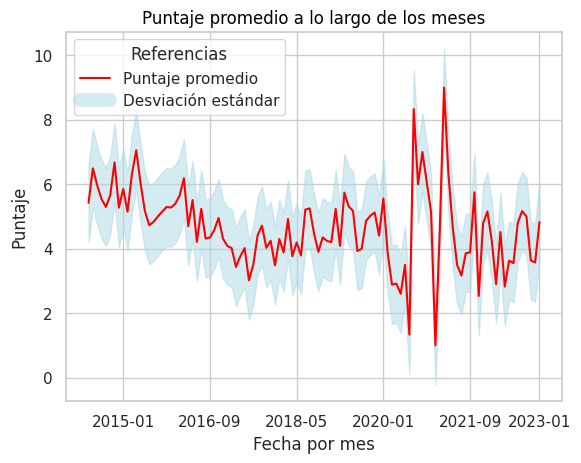

In [ ]:
sns.lineplot(x=plot_calificacion_promedio_por_mes['date'].astype(int), y=plot_calificacion_promedio_por_mes['rates'], color='red')
plt.title("Puntaje promedio a lo largo de los meses", color='black')
plt.xlabel('Fecha por mes')
plt.ylabel('Puntaje')
plt.xticks(ticks=[540, 560, 580, 600, 620, 636], labels=["2015-01", "2016-09", "2018-05", "2020-01", "2021-09", "2023-01"])

std_dev = plot_calificacion_promedio_por_mes['rates'].std()
plt.fill_between(
    plot_calificacion_promedio_por_mes['date_int'],
    plot_calificacion_promedio_por_mes['rates'] - std_dev,
    plot_calificacion_promedio_por_mes['rates'] + std_dev,
    color='lightblue',
    alpha=0.5
)

legend = plt.legend(title='Referencias')
line1 = mlines.Line2D([], [], color='red', label='Puntaje promedio', linestyle='-')
line2 = mlines.Line2D([], [], color='lightblue', label='Desviación estándar', linestyle='-', linewidth=10, alpha=0.5)

plt.legend(handles=[line1, line2], title='Referencias')

# Plots analisis de calificaciones por año

In [ ]:
calificacion_promedio_por_año

,date,rates
0,2014,5.85
1,2015,5.46
2,2016,4.96
3,2017,3.87
4,2018,4.35
5,2019,4.75
6,2020,4.35
7,2021,4.32
8,2022,4.01
9,2023,4.82


In [ ]:
calificacion_promedio_por_año['str_date'] = calificacion_promedio_por_año['date'].astype(str)
calificacion_promedio_por_año['date_replaced'] = calificacion_promedio_por_año['str_date'].str.replace('-', ',', regex=False)
calificacion_promedio_por_año['date_as_decimal'] = pd.to_numeric(calificacion_promedio_por_año['date_replaced'].str.replace(',', ''), errors='coerce')
calificacion_promedio_por_año

,date,rates,str_date,date_replaced,date_as_decimal
0,2014,5.85,2014,2014,2014
1,2015,5.46,2015,2015,2015
2,2016,4.96,2016,2016,2016
3,2017,3.87,2017,2017,2017
4,2018,4.35,2018,2018,2018
5,2019,4.75,2019,2019,2019
6,2020,4.35,2020,2020,2020
7,2021,4.32,2021,2021,2021
8,2022,4.01,2022,2022,2022
9,2023,4.82,2023,2023,2023


In [ ]:
calificacion_promedio_por_año.drop(columns=['date', 'str_date', 'date_replaced'])

,rates,date_as_decimal
0,5.85,2014
1,5.46,2015
2,4.96,2016
3,3.87,2017
4,4.35,2018
5,4.75,2019
6,4.35,2020
7,4.32,2021
8,4.01,2022
9,4.82,2023


(1.0, 10.0)

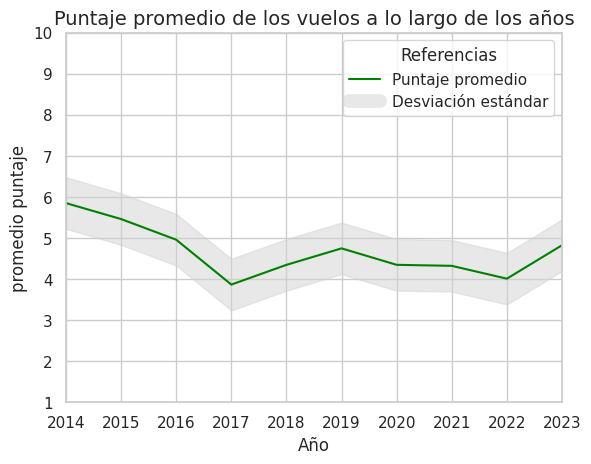

In [ ]:
sns.lineplot(data=calificacion_promedio_por_año , x='date_as_decimal', y='rates', color = 'green')

std_dev = calificacion_promedio_por_año['rates'].std()
plt.fill_between(
    calificacion_promedio_por_año['date_as_decimal'],
    calificacion_promedio_por_año['rates'] - std_dev,
    calificacion_promedio_por_año['rates'] + std_dev,
    color='lightgrey',
    alpha=0.5
)

leyenda = plt.legend(title='Referencias')
linea1 = mlines.Line2D([], [], color='green', label='Puntaje promedio', linestyle='-')
linea2 = mlines.Line2D([], [], color='lightgrey', label='Desviación estándar', linestyle='-', linewidth=10, alpha=0.5)

plt.legend(handles=[linea1, linea2], title='Referencias')

plt.title('Puntaje promedio de los vuelos a lo largo de los años', fontsize=14)
plt.xlabel("Año")
plt.ylabel("promedio puntaje")
plt.xlim(2014, 2023)
plt.ylim(1, 10)

In [ ]:
plot18

,mes,count
0,1,59
1,2,54
2,3,46
3,4,67
4,5,53
5,6,57
6,7,50
7,8,36
8,9,35
9,10,39


In [ ]:
plot18['str_date'] = plot18['mes'].astype(str)
plot18['mes_decimal'] = pd.to_numeric(plot18['str_date'].str.replace(',', ''), errors='coerce')
plot18

,mes,count,str_date,mes_decimal
0,1,59,1,1
1,2,54,2,2
2,3,46,3,3
3,4,67,4,4
4,5,53,5,5
5,6,57,6,6
6,7,50,7,7
7,8,36,8,8
8,9,35,9,9
9,10,39,10,10


In [ ]:
plot18.drop(columns=['mes', 'str_date'])

,count,mes_decimal
0,59,1
1,54,2
2,46,3
3,67,4
4,53,5
5,57,6
6,50,7
7,36,8
8,35,9
9,39,10


(0.0, 80.0)

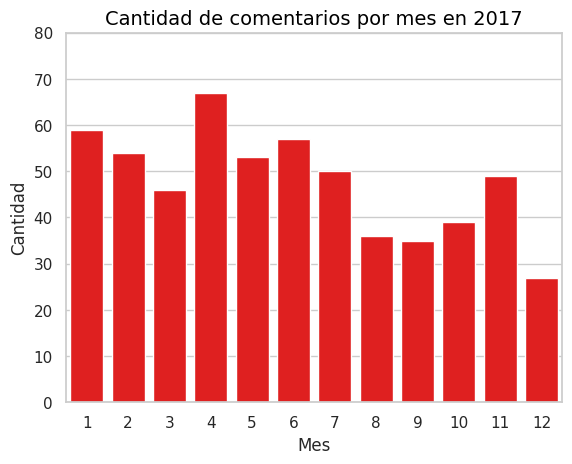

In [ ]:
sns.barplot(x='mes_decimal', y='count', data=plot18, color='red')

plt.title("Cantidad de comentarios por mes en 2017", fontsize=14, color='black')
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.ylim(0, 80)

In [ ]:
sentimiento_color = ['#ff7f0e', '#1f77b4', '#9467bd', '#8c564b', '#17becf', '#d62728']

Text(0, 0.5, 'Palabra clave')

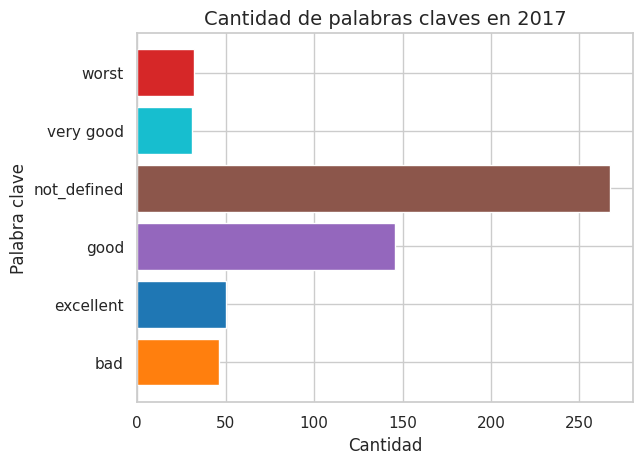

In [ ]:
# grafico con otro color
plt.barh(agrupacion_2017['key_word_reviews'], agrupacion_2017['count'], color=sentimiento_color)

plt.title('Cantidad de palabras claves en 2017', fontsize=14)
plt.xlabel('Cantidad')
plt.ylabel('Palabra clave')

Text(0, 0.5, 'Palabra clave')

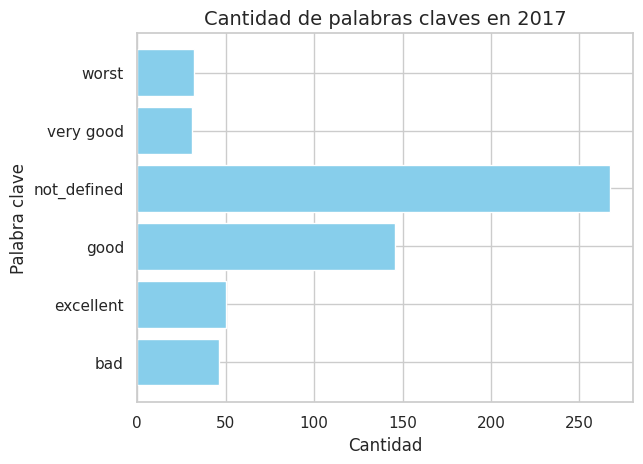

In [ ]:
plt.barh(agrupacion_2017['key_word_reviews'], agrupacion_2017['count'], color='skyblue')

plt.title('Cantidad de palabras claves en 2017', fontsize=14)
plt.xlabel('Cantidad')
plt.ylabel('Palabra clave')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'bad'),
  Text(1, 0, 'excellent'),
  Text(2, 0, 'good'),
  Text(3, 0, 'not_defined'),
  Text(4, 0, 'very good'),
  Text(5, 0, 'worst')])

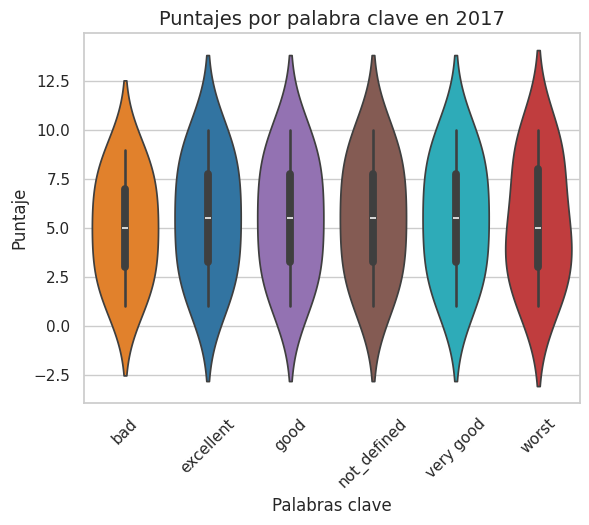

In [ ]:
sns.violinplot(x='key_word_reviews', y='rates', data=agrupacion_rate_2017, palette= sentimiento_color)
plt.title('Puntajes por palabra clave en 2017', fontsize = 14)
plt.ylabel('Puntaje')
plt.xlabel('Palabras clave')
plt.xticks(rotation=45)

In [ ]:
plot_2020

,mes,count
0,1,34
1,2,14
2,3,17
3,4,12
4,5,5
5,6,4
6,7,3
7,8,3
8,9,2
9,10,3


In [ ]:
plot_2020['str_date'] = plot_2020['mes'].astype(str)
plot_2020['mes_decimal'] = pd.to_numeric(plot_2020['str_date'].str.replace(',', ''), errors='coerce')
plot_2020

,mes,count,str_date,mes_decimal
0,1,34,1,1
1,2,14,2,2
2,3,17,3,3
3,4,12,4,4
4,5,5,5,5
5,6,4,6,6
6,7,3,7,7
7,8,3,8,8
8,9,2,9,9
9,10,3,10,10


In [ ]:
plot_2020.drop(columns=['mes', 'str_date'])

,count,mes_decimal
0,34,1
1,14,2
2,17,3
3,12,4
4,5,5
5,4,6
6,3,7
7,3,8
8,2,9
9,3,10


(0.0, 80.0)

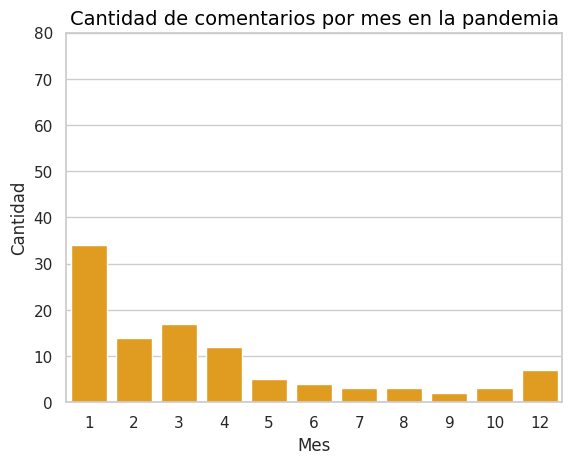

In [ ]:
sns.barplot(x='mes_decimal', y='count', data=plot_2020, color='orange')

plt.title("Cantidad de comentarios por mes en la pandemia", fontsize=14, color='black')
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.ylim(0, 80)

In [ ]:
df3_cant_2020 = archivo_tres.loc[archivo_tres['date'].dt.year == 2020]
df3_cant_2020['mes'] = df3_cant_2020['date'].dt.month
df3_cant_2020

,Unnamed: 0,reviews,rates,date,country,verified,comments,key_word_reviews,key_word_comments,comments_cleaned,sentimiento,mes
317,317,Not Verified | Charge £700 fee to make an ame...,1,2020-12-30,United Kingdom,False,verified charge fee make amendment booked holi...,bad,bad,verified charge fee make amendment booked holi...,negativo,12
318,318,Not Verified | Good service the whole way. No...,1,2020-12-27,United Kingdom,False,verified good service whole way nothing except...,good,good,verified good service whole way nothing except...,positivo,12
319,319,Not Verified | I entered the plane with a bun...,10,2020-12-26,United Kingdom,False,verified entered plane bunch white flower flig...,not_defined,not_defined,verified entered plane bunch white flower flig...,positivo,12
320,320,✅ Trip Verified | I was supposed to fly with ...,4,2020-12-25,United Kingdom,True,supposed fly aeroflot rd december moscow russi...,not_defined,not_defined,supposed fly aeroflot rd december moscow russi...,positivo,12
321,321,✅ Trip Verified | Dubai to London on 5th Dece...,1,2020-12-09,United Kingdom,True,dubai london th december flight ok seat comfor...,good,good,dubai london th december flight ok seat comfor...,positivo,12
...,...,...,...,...,...,...,...,...,...,...,...,...
416,416,✅ Trip Verified | London to Hong Kong. At the...,10,2020-01-06,Saint Kitts and Nevis,True,london hong kong entrance ba business lounge s...,not_defined,not_defined,london hong kong entrance ba business lounge s...,positivo,1
417,417,Not Verified | Los Angeles to London Heathrow...,3,2020-01-06,United States,False,verified los angeles london heathrow could giv...,worst,worst,verified los angeles london heathrow could giv...,negativo,1
418,418,✅ Trip Verified | Istanbul to London. We had ...,10,2020-01-05,United Kingdom,True,istanbul london wait age check flight advised ...,not_defined,not_defined,istanbul london wait age check flight advised ...,negativo,1
419,419,✅ Trip Verified | London to Bucharest. On my ...,1,2020-01-04,United Kingdom,True,london bucharest flight hot food finished half...,not_defined,not_defined,london bucharest flight hot food finished half...,positivo,1


In [ ]:
plot_2020_b = df3_cant_2020.groupby(['rates']).size().reset_index(name='count')
plot_2020_b

,rates,count
0,1,37
1,2,9
2,3,12
3,4,4
4,5,4
5,6,2
6,7,7
7,8,9
8,9,8
9,10,12


Text(0, 0.5, 'Cantidad')

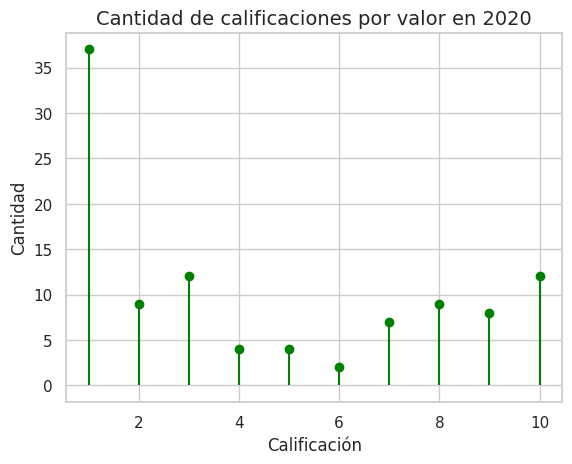

In [ ]:
plt.stem(plot_2020_b['rates'], plot_2020_b['count'], basefmt=' ', linefmt='green', markerfmt='o', use_line_collection=True)
plt.title("Cantidad de calificaciones por valor en 2020", fontsize=14)
plt.xlabel("Calificación")
plt.ylabel("Cantidad")

In [ ]:
plot_2014

,mes,count
0,5,19
1,6,73
2,7,55
3,8,39
4,9,64
5,10,75
6,11,56
7,12,51


In [ ]:
plot_2014['str_date'] = plot_2014['mes'].astype(str)
plot_2014['mes_decimal'] = pd.to_numeric(plot_2014['str_date'].str.replace(',', ''), errors='coerce')
plot_2014

,mes,count,str_date,mes_decimal
0,5,19,5,5
1,6,73,6,6
2,7,55,7,7
3,8,39,8,8
4,9,64,9,9
5,10,75,10,10
6,11,56,11,11
7,12,51,12,12


In [ ]:
plot_2014.drop(columns=['mes', 'str_date'])

,count,mes_decimal
0,19,5
1,73,6
2,55,7
3,39,8
4,64,9
5,75,10
6,56,11
7,51,12


(0.0, 80.0)

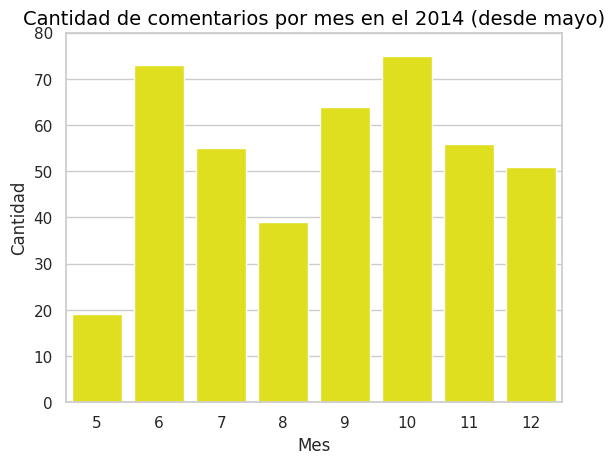

In [ ]:
sns.barplot(x='mes_decimal', y='count', data=plot_2014, color='yellow')

plt.title("Cantidad de comentarios por mes en el 2014 (desde mayo)", fontsize=14, color='black')
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.ylim(0, 80)

(0.0, 250.0)

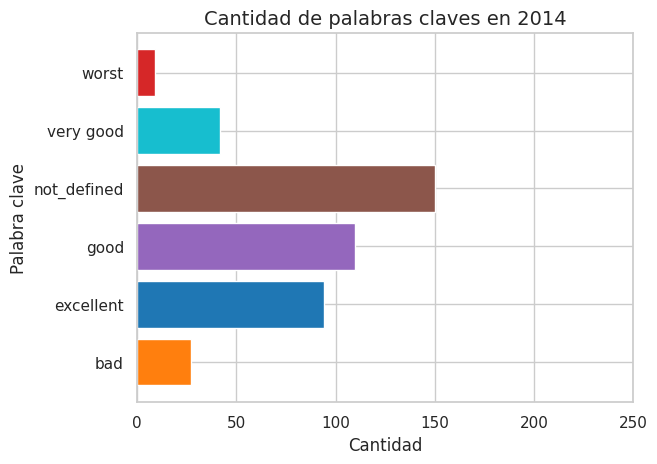

In [ ]:
# otros colores
plt.barh(agrupacion_2014['key_word_reviews'], agrupacion_2014['count'], color=sentimiento_color)

plt.title('Cantidad de palabras claves en 2014', fontsize=14)
plt.xlabel('Cantidad')
plt.ylabel('Palabra clave')
plt.xlim(0, 250)

(0.0, 250.0)

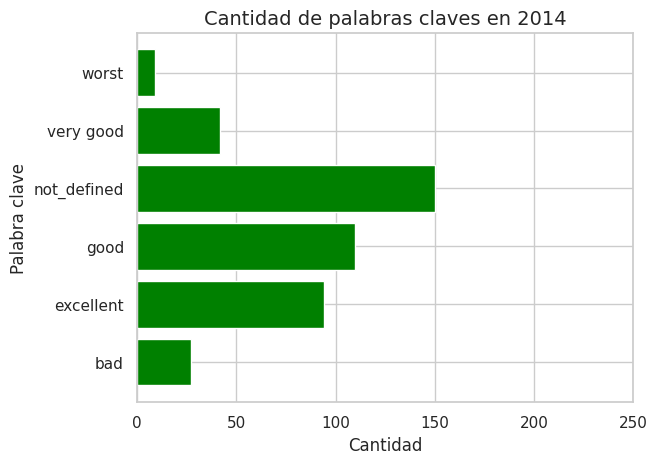

In [ ]:
plt.barh(agrupacion_2014['key_word_reviews'], agrupacion_2014['count'], color='green')

plt.title('Cantidad de palabras claves en 2014', fontsize=14)
plt.xlabel('Cantidad')
plt.ylabel('Palabra clave')
plt.xlim(0, 250)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'bad'),
  Text(1, 0, 'excellent'),
  Text(2, 0, 'good'),
  Text(3, 0, 'not_defined'),
  Text(4, 0, 'very good'),
  Text(5, 0, 'worst')])

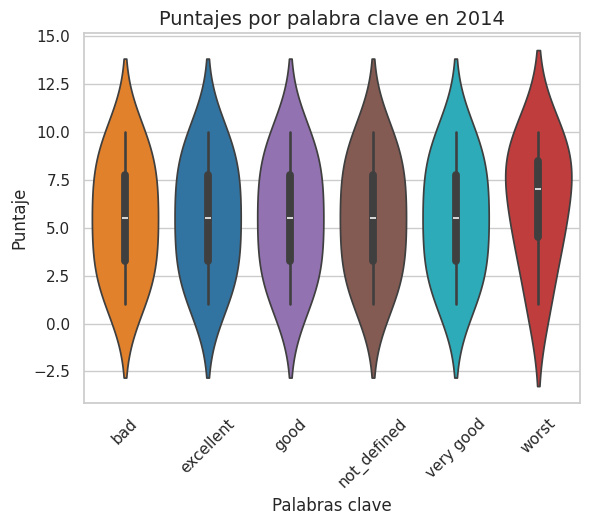

In [ ]:
sns.violinplot(x='key_word_reviews', y='rates', data=agrupacion_rate_2014, palette=sentimiento_color)
plt.title('Puntajes por palabra clave en 2014', fontsize = 14)
plt.ylabel('Puntaje')
plt.xlabel('Palabras clave')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'bad'),
  Text(1, 0, 'excellent'),
  Text(2, 0, 'good'),
  Text(3, 0, 'not_defined'),
  Text(4, 0, 'very good'),
  Text(5, 0, 'worst')])

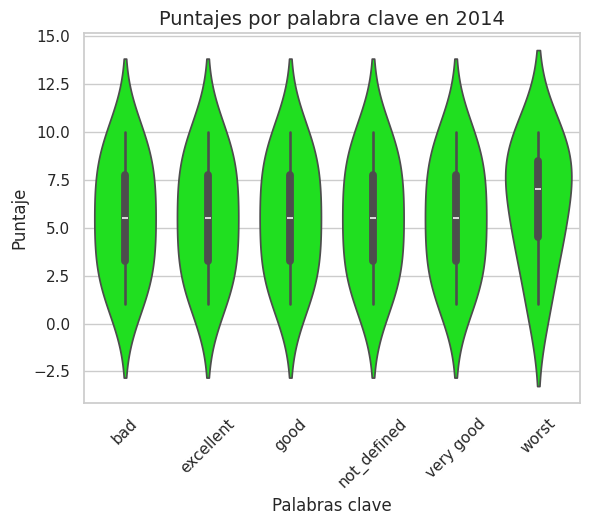

In [ ]:
sns.violinplot(x='key_word_reviews', y='rates', data=agrupacion_rate_2014, color='lime')
plt.title('Puntajes por palabra clave en 2014', fontsize = 14)
plt.ylabel('Puntaje')
plt.xlabel('Palabras clave')
plt.xticks(rotation=45)

In [ ]:
cant_comentarios_por_año

,date,count
0,2014,432
1,2015,736
2,2016,570
3,2017,572
4,2018,324
5,2019,356
6,2020,104
7,2021,87
8,2022,213
9,2023,17


Text(0, 0.5, 'Cantidad')

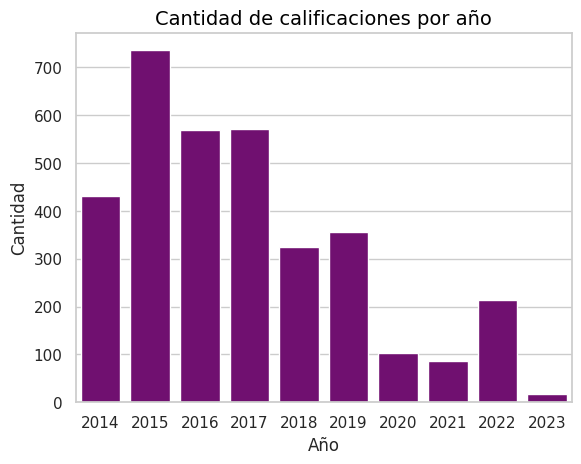

In [ ]:
sns.barplot(x='date', y='count', data=cant_comentarios_por_año, color='purple')
plt.title("Cantidad de calificaciones por año", fontsize=14, color='black')
plt.xlabel("Año")
plt.ylabel("Cantidad")

# Plots paises

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

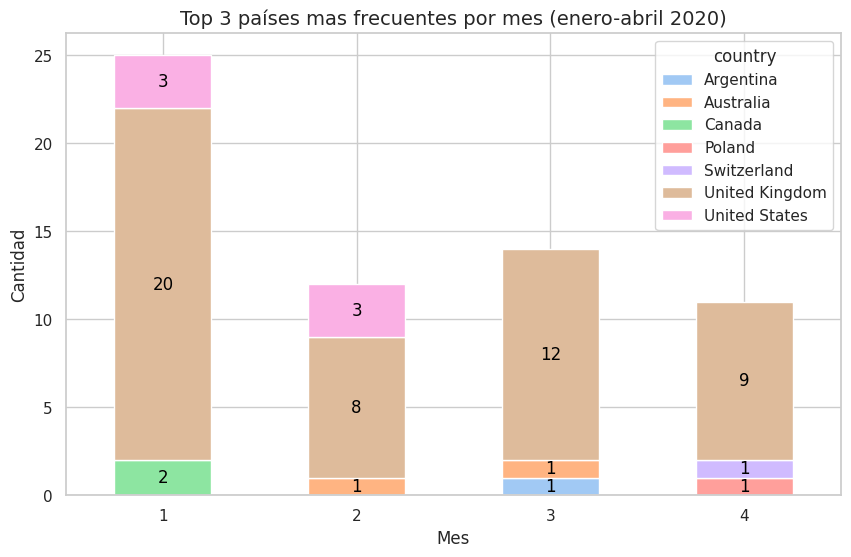

In [ ]:

combinado_pivot = combinado.pivot(index='month', columns='country', values='count')
colores = sns.color_palette("pastel", len(combinado_pivot.columns))

ax = combinado_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color = colores)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()  # Obtener la altura del segmento de barra
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Posición X
                bar.get_y() + height / 2,  # Posición Y
                f'{int(height)}',  # Etiqueta (convertir a entero para eliminar decimales)
                ha='center',  # Alineación horizontal
                va='center',  # Alineación vertical
                color='black'  # Color del texto
            )

plt.title("Top 3 países mas frecuentes por mes (enero-abril 2020)", fontsize = 14)
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.xticks(rotation=360)

# Plots vias de compra de vuelos



Text(0.5, 1.0, 'Distribucion de vuelos comprados via Internet y via Mobile')

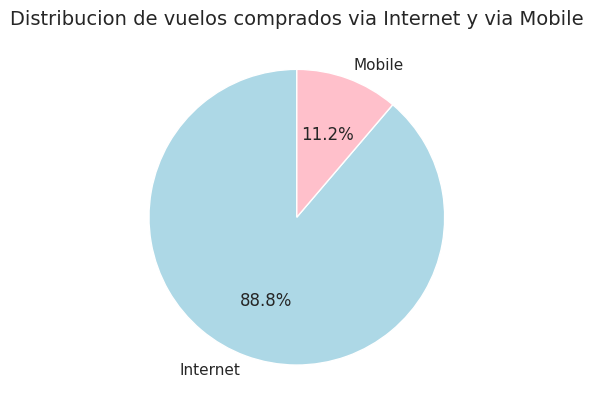

In [ ]:
labels = list(counts_channel.keys())  # ['Internet', 'Mobile']
plt.pie([44366, 5616], labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Distribucion de vuelos comprados via Internet y via Mobile', fontsize=14)

Text(0, 0.5, 'Cantidad')

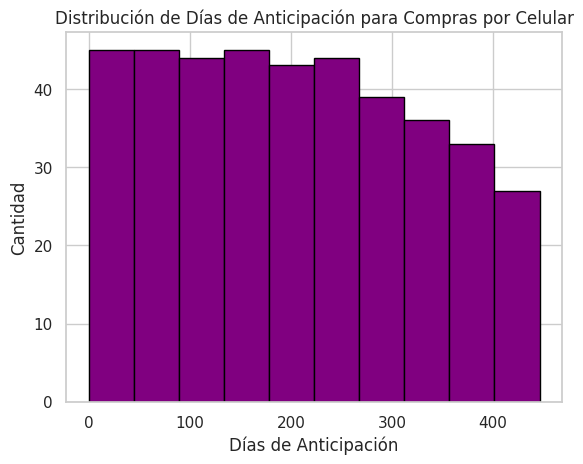

In [ ]:
plt.hist(plot4_mobile['purchase_lead'], bins=10, color='purple', edgecolor='black')  # Puedes ajustar el número de bins

plt.title("Distribución de Días de Anticipación para Compras por Celular")
plt.xlabel("Días de Anticipación")
plt.ylabel("Cantidad")

Text(0, 0.5, 'Cantidad')

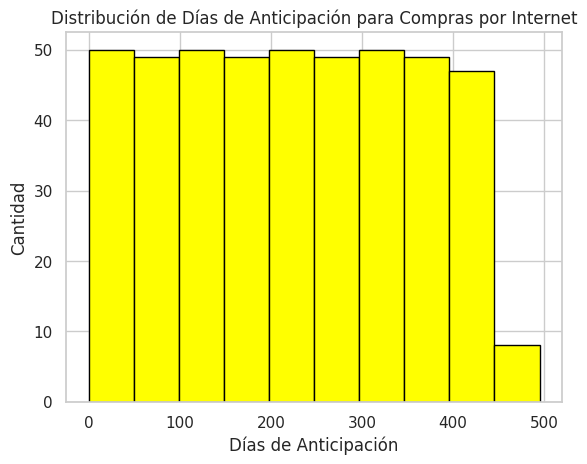

In [ ]:
plt.hist(plot4_internet['purchase_lead'], bins=10, color='yellow', edgecolor='black')  # Puedes ajustar el número de bins

plt.title("Distribución de Días de Anticipación para Compras por Internet")
plt.xlabel("Días de Anticipación")
plt.ylabel("Cantidad")

Text(0.5, 1.0, 'Distribucion de cantidad de pasajeros en vuelos comprados via Mobile')

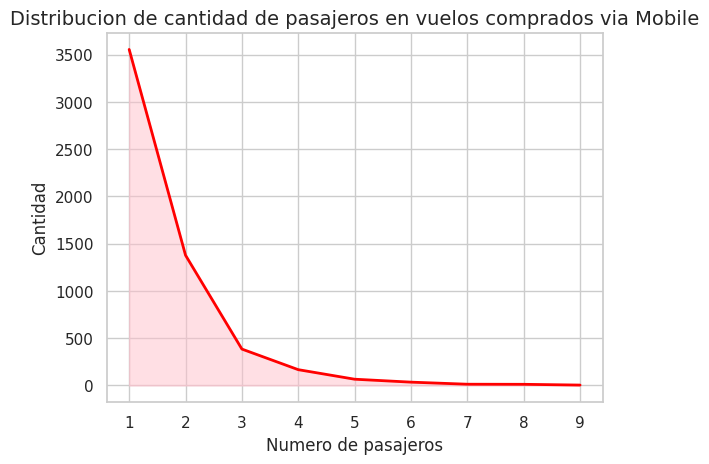

In [ ]:
plt.fill_between(plot_salechannel_m['num_passengers'], plot_salechannel_m['count'], color='pink', alpha=0.5)
plt.plot(plot_salechannel_m['num_passengers'], plot_salechannel_m['count'], color='red', linewidth=2)
plt.xlabel('Numero de pasajeros')
plt.ylabel('Cantidad')
plt.title('Distribucion de cantidad de pasajeros en vuelos comprados via Mobile', fontsize = 14)

Text(0, 0.5, 'Cantidad')

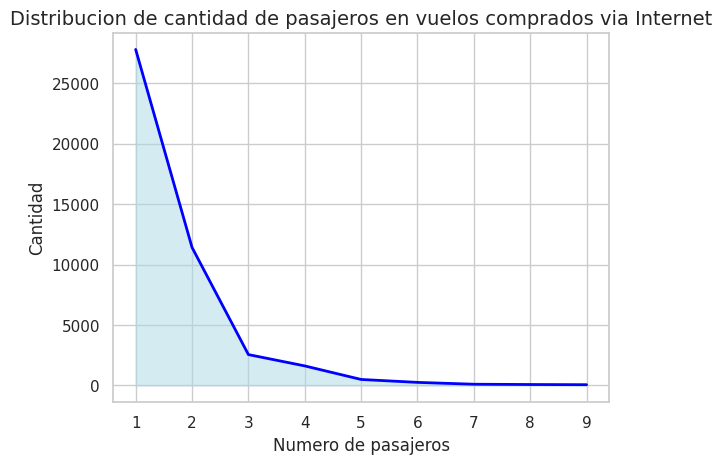

In [ ]:
plt.fill_between(plot_salechannel_i['num_passengers'], plot_salechannel_i['count'], color='lightblue', alpha=0.5)
plt.plot(plot_salechannel_i['num_passengers'], plot_salechannel_i['count'], color='blue', linewidth=2)
plt.title('Distribucion de cantidad de pasajeros en vuelos comprados via Internet', fontsize = 14)
plt.xlabel('Numero de pasajeros')
plt.ylabel('Cantidad')

In [ ]:
import seaborn as sns

# Obtener la paleta de colores "tab10"
paleta_tab10 = sns.color_palette("tab10")

# Obtener los códigos hexadecimales de los colores en la paleta "tab10"
colores_hex_tab10 = paleta_tab10.as_hex()

# Imprimir los códigos hexadecimales
print(colores_hex_tab10)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
